In [1]:
import pandas as pd


In [2]:
pwd


'C:\\Users\\PeterLi\\2018 Tensorflow'

In [3]:
dataset = pd.read_csv('pima-indians-diabetes.csv')
dataset.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
dataset.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
col_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [6]:
 dataset[col_norm] = dataset[col_norm].apply(lambda x : (x- x.min())/(x.max()- x.min()))

In [7]:
dataset.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [8]:
import tensorflow as tf

C:\Users\PeterLi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [9]:
dataset.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [10]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [11]:
group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size= 10)

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

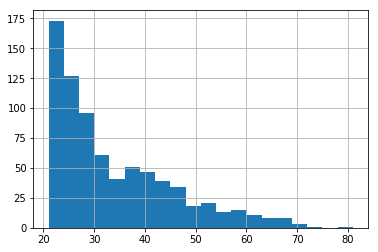

In [13]:
dataset['Age'].hist(bins=20)

In [14]:
age = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [15]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,group, age]

In [16]:
# train test split


In [17]:
x_data= dataset.drop('Class', axis =1)

In [18]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [19]:
labels = dataset['Class']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size = 0.3, random_state =101)

In [22]:
input_func = tf.estimator.inputs.pandas_input_fn(x = X_train, y = y_train, 
                                                batch_size = 10, num_epochs = 1000,
                                                shuffle = True)

In [23]:
model = tf.estimator.LinearClassifier(feature_columns= feat_cols, n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\PeterLi\\AppData\\Local\\Temp\\tmp103ex27z', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020BFC1A4A90>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [24]:
model.train(input_fn= input_func, steps =1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\PeterLi\AppData\Local\Temp\tmp103ex27z\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 104.773
INFO:tensorflow:loss = 6.0418453, step = 101 (0.955 sec)
INFO:tensorflow:global_step/sec: 119.651
INFO:tensorflow:loss = 5.6401052, step = 201 (0.836 sec)
INFO:tensorflow:global_step/sec: 120.081
INFO:tensorflow:loss = 4.1968884, step = 301 (0.834 sec)
INFO:tensorflow:global_step/sec: 125.491
INFO:tensorflow:loss = 4.76834, step = 401 (0.796 sec)
INFO:tensorflow:global_step/sec: 125.648
INFO:tensorflow:loss = 5.6746235, step = 501 (0.796 sec)
INFO:tensorflow:global_step/sec: 124.866
INFO:tensorflow:loss = 6.909027, step = 601 (0.802 sec)
INFO:tensorflow:global_step/sec: 123.634
INFO:tensorflow:loss = 6.131632, step = 701 (0.811 sec)
INFO:tensorflow:global_step/sec: 125.649
INFO:tensorflow:loss = 4.2990203, step = 801 (0.794 sec)
INFO:tensorflow:global_step/

In [25]:
eval_input = tf.estimator.inputs.pandas_input_fn(x = X_test, y = y_test, batch_size = 8,
                                                num_epochs = 1000,
                                                shuffle = True)

In [36]:
results = model.evaluate(eval_input)

INFO:tensorflow:Starting evaluation at 2018-09-17-02:45:16
INFO:tensorflow:Restoring parameters from C:\Users\PeterLi\AppData\Local\Temp\tmp103ex27z\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-09-17-02:48:51
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74458873, accuracy_baseline = 0.64935064, auc = 0.7979835, auc_precision_recall = 0.63862705, average_loss = 0.52907676, global_step = 1000, label/mean = 0.35064936, loss = 4.232614, prediction/mean = 0.37108767


In [37]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, batch_size = 10, num_epochs = 1, shuffle = False)

In [38]:
predictions = model.predict(pred_input_func)

In [39]:
my_pred = list(predictions)
my_pred

INFO:tensorflow:Restoring parameters from C:\Users\PeterLi\AppData\Local\Temp\tmp103ex27z\model.ckpt-1000


[{'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.5350887], dtype=float32),
  'logits': array([0.14058602], dtype=float32),
  'probabilities': array([0.46491125, 0.5350887 ], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.6346261], dtype=float32),
  'logits': array([0.5521146], dtype=float32),
  'probabilities': array([0.36537397, 0.6346261 ], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.37110558], dtype=float32),
  'logits': array([-0.5274767], dtype=float32),
  'probabilities': array([0.6288944 , 0.37110558], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.3587945], dtype=float32),
  'logits': array([-0.5806001], dtype=float32),
  'probabilities': array([0.6412055 , 0.35879454], dtype=float32)},
 {'class_ids


#DNN models

In [28]:
embedded_group_col = tf.feature_column.embedding_column(group, dimension=10)


In [29]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,embedded_group_col, age]

In [30]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train,y_train, batch_size = 10,
                                                num_epochs = 1000, shuffle = True)

In [31]:
dnn_model = tf.estimator.DNNClassifier(feature_columns= feat_cols, n_classes= 2, hidden_units=[10,10,10])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\PeterLi\\AppData\\Local\\Temp\\tmpk2g_k4re', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020BFC46BCF8>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [32]:
dnn_model.train(input_func)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\PeterLi\AppData\Local\Temp\tmpk2g_k4re\model.ckpt.
INFO:tensorflow:loss = 7.1942315, step = 1
INFO:tensorflow:global_step/sec: 104.374
INFO:tensorflow:loss = 5.6816483, step = 101 (0.959 sec)
INFO:tensorflow:global_step/sec: 133.081
INFO:tensorflow:loss = 8.062018, step = 201 (0.752 sec)
INFO:tensorflow:global_step/sec: 132.776
INFO:tensorflow:loss = 5.299652, step = 301 (0.752 sec)
INFO:tensorflow:global_step/sec: 128.758
INFO:tensorflow:loss = 5.373228, step = 401 (0.777 sec)
INFO:tensorflow:global_step/sec: 132.562
INFO:tensorflow:loss = 5.140386, step = 501 (0.755 sec)
INFO:tensorflow:global_step/sec: 126.938
INFO:tensorflow:loss = 3.0164254, step = 601 (0.788 sec)
INFO:tensorflow:global_step/sec: 128.612
INFO:tensorflow:loss = 3.8519917, step = 701 (0.777 sec)
INFO:tensorflow:global_step/sec: 134.975
INFO:tensorflow:loss = 6.6711636, step = 801 (0.742 sec)
INFO:tensorflow:global_step

INFO:tensorflow:loss = 4.3352413, step = 8201 (0.769 sec)
INFO:tensorflow:global_step/sec: 129.211
INFO:tensorflow:loss = 2.3978357, step = 8301 (0.774 sec)
INFO:tensorflow:global_step/sec: 127.73
INFO:tensorflow:loss = 4.1050925, step = 8401 (0.783 sec)
INFO:tensorflow:global_step/sec: 136.604
INFO:tensorflow:loss = 5.1755924, step = 8501 (0.732 sec)
INFO:tensorflow:global_step/sec: 127.729
INFO:tensorflow:loss = 4.8824663, step = 8601 (0.784 sec)
INFO:tensorflow:global_step/sec: 129.211
INFO:tensorflow:loss = 3.9351146, step = 8701 (0.774 sec)
INFO:tensorflow:global_step/sec: 127.567
INFO:tensorflow:loss = 9.761869, step = 8801 (0.783 sec)
INFO:tensorflow:global_step/sec: 131.069
INFO:tensorflow:loss = 7.309667, step = 8901 (0.762 sec)
INFO:tensorflow:global_step/sec: 129.044
INFO:tensorflow:loss = 6.1567082, step = 9001 (0.776 sec)
INFO:tensorflow:global_step/sec: 136.234
INFO:tensorflow:loss = 0.90352243, step = 9101 (0.734 sec)
INFO:tensorflow:global_step/sec: 132.98
INFO:tensorfl

INFO:tensorflow:global_step/sec: 128.056
INFO:tensorflow:loss = 2.6628423, step = 16501 (0.781 sec)
INFO:tensorflow:global_step/sec: 126.117
INFO:tensorflow:loss = 4.357354, step = 16601 (0.793 sec)
INFO:tensorflow:global_step/sec: 129.886
INFO:tensorflow:loss = 5.4919825, step = 16701 (0.771 sec)
INFO:tensorflow:global_step/sec: 130.557
INFO:tensorflow:loss = 2.8106961, step = 16801 (0.765 sec)
INFO:tensorflow:global_step/sec: 131.068
INFO:tensorflow:loss = 3.1925972, step = 16901 (0.762 sec)
INFO:tensorflow:global_step/sec: 134.047
INFO:tensorflow:loss = 1.8682855, step = 17001 (0.748 sec)
INFO:tensorflow:global_step/sec: 135.497
INFO:tensorflow:loss = 2.3537745, step = 17101 (0.738 sec)
INFO:tensorflow:global_step/sec: 131.758
INFO:tensorflow:loss = 2.54187, step = 17201 (0.760 sec)
INFO:tensorflow:global_step/sec: 129.044
INFO:tensorflow:loss = 4.0476933, step = 17301 (0.775 sec)
INFO:tensorflow:global_step/sec: 128.383
INFO:tensorflow:loss = 2.785242, step = 17401 (0.777 sec)
INFO

INFO:tensorflow:loss = 1.8060575, step = 24701 (0.716 sec)
INFO:tensorflow:global_step/sec: 130.387
INFO:tensorflow:loss = 3.185745, step = 24801 (0.767 sec)
INFO:tensorflow:global_step/sec: 129.211
INFO:tensorflow:loss = 2.1738057, step = 24901 (0.774 sec)
INFO:tensorflow:global_step/sec: 125.022
INFO:tensorflow:loss = 3.2402208, step = 25001 (0.800 sec)
INFO:tensorflow:global_step/sec: 125.806
INFO:tensorflow:loss = 3.1406536, step = 25101 (0.795 sec)
INFO:tensorflow:global_step/sec: 129.045
INFO:tensorflow:loss = 2.6459298, step = 25201 (0.775 sec)
INFO:tensorflow:global_step/sec: 132.805
INFO:tensorflow:loss = 1.0973321, step = 25301 (0.753 sec)
INFO:tensorflow:global_step/sec: 129.545
INFO:tensorflow:loss = 6.1048107, step = 25401 (0.772 sec)
INFO:tensorflow:global_step/sec: 137.353
INFO:tensorflow:loss = 1.3865044, step = 25501 (0.728 sec)
INFO:tensorflow:global_step/sec: 128.055
INFO:tensorflow:loss = 2.6947904, step = 25601 (0.781 sec)
INFO:tensorflow:global_step/sec: 129.377
I

INFO:tensorflow:global_step/sec: 133.157
INFO:tensorflow:loss = 4.525872, step = 33001 (0.751 sec)
INFO:tensorflow:global_step/sec: 131.585
INFO:tensorflow:loss = 1.9306601, step = 33101 (0.760 sec)
INFO:tensorflow:global_step/sec: 135.863
INFO:tensorflow:loss = 2.7674189, step = 33201 (0.736 sec)
INFO:tensorflow:global_step/sec: 137.353
INFO:tensorflow:loss = 1.421315, step = 33301 (0.729 sec)
INFO:tensorflow:global_step/sec: 132.805
INFO:tensorflow:loss = 1.3920105, step = 33401 (0.752 sec)
INFO:tensorflow:global_step/sec: 130.217
INFO:tensorflow:loss = 0.76338255, step = 33501 (0.768 sec)
INFO:tensorflow:global_step/sec: 132.63
INFO:tensorflow:loss = 1.8068898, step = 33601 (0.753 sec)
INFO:tensorflow:global_step/sec: 132.981
INFO:tensorflow:loss = 1.1172814, step = 33701 (0.753 sec)
INFO:tensorflow:global_step/sec: 130.048
INFO:tensorflow:loss = 2.630033, step = 33801 (0.771 sec)
INFO:tensorflow:global_step/sec: 136.418
INFO:tensorflow:loss = 3.1360335, step = 33901 (0.732 sec)
INF

INFO:tensorflow:loss = 7.354722, step = 41201 (0.722 sec)
INFO:tensorflow:global_step/sec: 131.757
INFO:tensorflow:loss = 1.6160635, step = 41301 (0.759 sec)
INFO:tensorflow:global_step/sec: 136.605
INFO:tensorflow:loss = 2.4070044, step = 41401 (0.732 sec)
INFO:tensorflow:global_step/sec: 134.767
INFO:tensorflow:loss = 2.957806, step = 41501 (0.742 sec)
INFO:tensorflow:global_step/sec: 135.496
INFO:tensorflow:loss = 2.1479082, step = 41601 (0.738 sec)
INFO:tensorflow:global_step/sec: 119.083
INFO:tensorflow:loss = 5.925893, step = 41701 (0.839 sec)
INFO:tensorflow:global_step/sec: 123.94
INFO:tensorflow:loss = 3.33502, step = 41801 (0.808 sec)
INFO:tensorflow:global_step/sec: 134.048
INFO:tensorflow:loss = 1.2923669, step = 41901 (0.746 sec)
INFO:tensorflow:global_step/sec: 132.805
INFO:tensorflow:loss = 1.8124385, step = 42001 (0.754 sec)
INFO:tensorflow:global_step/sec: 134.949
INFO:tensorflow:loss = 3.4928842, step = 42101 (0.740 sec)
INFO:tensorflow:global_step/sec: 125.334
INFO:t

INFO:tensorflow:global_step/sec: 130.897
INFO:tensorflow:loss = 3.8571951, step = 49501 (0.764 sec)
INFO:tensorflow:global_step/sec: 136.418
INFO:tensorflow:loss = 2.0211656, step = 49601 (0.733 sec)
INFO:tensorflow:global_step/sec: 134.027
INFO:tensorflow:loss = 2.608377, step = 49701 (0.746 sec)
INFO:tensorflow:global_step/sec: 139.16
INFO:tensorflow:loss = 0.74054945, step = 49801 (0.718 sec)
INFO:tensorflow:global_step/sec: 131.422
INFO:tensorflow:loss = 5.905147, step = 49901 (0.762 sec)
INFO:tensorflow:global_step/sec: 132.014
INFO:tensorflow:loss = 5.0288234, step = 50001 (0.759 sec)
INFO:tensorflow:global_step/sec: 124.644
INFO:tensorflow:loss = 1.435383, step = 50101 (0.802 sec)
INFO:tensorflow:global_step/sec: 126.122
INFO:tensorflow:loss = 4.9322896, step = 50201 (0.792 sec)
INFO:tensorflow:global_step/sec: 127.451
INFO:tensorflow:loss = 1.049063, step = 50301 (0.783 sec)
INFO:tensorflow:global_step/sec: 132.211
INFO:tensorflow:loss = 2.8283622, step = 50401 (0.757 sec)
INFO

In [34]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(X_test, y_test, batch_size = 10, num_epochs = 1, shuffle = False  )

In [35]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-09-17-02:40:24
INFO:tensorflow:Restoring parameters from C:\Users\PeterLi\AppData\Local\Temp\tmpk2g_k4re\model.ckpt-53700
INFO:tensorflow:Finished evaluation at 2018-09-17-02:40:25
INFO:tensorflow:Saving dict for global step 53700: accuracy = 0.7316017, accuracy_baseline = 0.64935064, auc = 0.79041153, auc_precision_recall = 0.6640056, average_loss = 0.6861739, global_step = 53700, label/mean = 0.35064936, loss = 6.604424, prediction/mean = 0.36308092


{'accuracy': 0.7316017,
 'accuracy_baseline': 0.64935064,
 'auc': 0.79041153,
 'auc_precision_recall': 0.6640056,
 'average_loss': 0.6861739,
 'global_step': 53700,
 'label/mean': 0.35064936,
 'loss': 6.604424,
 'prediction/mean': 0.36308092}